In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from enum import Enum
%matplotlib inline

In [3]:
class Labels(Enum):
    ALL = 0,
    TOXIC = 1,
    SEVERE_TOXIC = 2,
    OBSCENE = 3,
    THREAT = 4,
    INSULT = 5,
    IDENTITY_HATE = 6
    
class YoutoxicLabels(Enum):
    ALL = 0,
    TOXIC = 1,
    ABUSIVE = 2,
    HATE_SPEECH = 3

class DataSets(Enum):
    TRAIN = 0,
    VALIDATION = 1

class Metrics(Enum):
    ROC_AUC = 0,
    F1 = 1

In [4]:
def calculate_mean_std(eval_scores, data_set, label, metric):
    current_scores = eval_scores[:, data_set.value, :, label.value, metric.value]
    if current_scores.ndim == 3:
        best_epochs = current_scores.max(axis=2)
    elif current_scores.ndim == 2:
        best_epochs = current_scores.max(axis=1)
    #print(best_epochs.shape)
    return best_epochs.mean(), best_epochs.std()

def calculated_all_metrics(scores):
    roc_all_mean, roc_all_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.ALL, Metrics.ROC_AUC)
    roc_c1_mean, roc_c1_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.TOXIC, Metrics.ROC_AUC)
    roc_c2_mean, roc_c2_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.SEVERE_TOXIC, Metrics.ROC_AUC)
    roc_c3_mean, roc_c3_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.OBSCENE, Metrics.ROC_AUC)
    roc_c4_mean, roc_c4_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.THREAT, Metrics.ROC_AUC)
    roc_c5_mean, roc_c5_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.INSULT, Metrics.ROC_AUC)
    roc_c6_mean, roc_c6_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.IDENTITY_HATE, Metrics.ROC_AUC)
    f1_all_mean, f1_all_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.ALL, Metrics.F1)
    f1_c1_mean, f1_c1_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.TOXIC, Metrics.F1)
    f1_c2_mean, f1_c2_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.SEVERE_TOXIC, Metrics.F1)
    f1_c3_mean, f1_c3_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.OBSCENE, Metrics.F1)
    f1_c4_mean, f1_c4_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.THREAT, Metrics.F1)
    f1_c5_mean, f1_c5_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.INSULT, Metrics.F1)
    f1_c6_mean, f1_c6_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.IDENTITY_HATE, Metrics.F1)
    
    print("ROC AUC over 5 runs:")
    print("{:20s} {:.4f} ±{:.4f}".format('All labels:', roc_all_mean, roc_all_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Toxic:', roc_c1_mean, roc_c1_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Severe toxic:', roc_c2_mean, roc_c2_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Obscene:', roc_c3_mean, roc_c3_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Threat:', roc_c4_mean, roc_c4_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Insult:', roc_c5_mean, roc_c5_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Identity hate:', roc_c6_mean, roc_c6_std))
    print("F1 over 5 runs:")
    print("{:20s} {:.4f} ±{:.4f}".format('All labels:', f1_all_mean, f1_all_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Toxic:', f1_c1_mean, f1_c1_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Severe toxic:', f1_c2_mean, f1_c2_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Obscene:', f1_c3_mean, f1_c3_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Threat:', f1_c4_mean, f1_c4_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Insult:', f1_c5_mean, f1_c5_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Identity hate:', f1_c6_mean, f1_c6_std))
    
def calculate_all_youtoxic_metrics(scores):
    roc_all_mean, roc_all_std = calculate_mean_std(scores, DataSets.VALIDATION, YoutoxicLabels.ALL, Metrics.ROC_AUC)
    roc_c1_mean, roc_c1_std = calculate_mean_std(scores, DataSets.VALIDATION, YoutoxicLabels.TOXIC, Metrics.ROC_AUC)
    roc_c2_mean, roc_c2_std = calculate_mean_std(scores, DataSets.VALIDATION, YoutoxicLabels.ABUSIVE, Metrics.ROC_AUC)
    roc_c3_mean, roc_c3_std = calculate_mean_std(scores, DataSets.VALIDATION, YoutoxicLabels.HATE_SPEECH, Metrics.ROC_AUC)    
    f1_all_mean, f1_all_std = calculate_mean_std(scores, DataSets.VALIDATION, YoutoxicLabels.ALL, Metrics.F1)
    f1_c1_mean, f1_c1_std = calculate_mean_std(scores, DataSets.VALIDATION, YoutoxicLabels.TOXIC, Metrics.F1)
    f1_c2_mean, f1_c2_std = calculate_mean_std(scores, DataSets.VALIDATION, YoutoxicLabels.ABUSIVE, Metrics.F1)
    f1_c3_mean, f1_c3_std = calculate_mean_std(scores, DataSets.VALIDATION, YoutoxicLabels.HATE_SPEECH, Metrics.F1)
    
    print("ROC AUC over 5 runs:")
    print("{:20s} {:.4f} ±{:.4f}".format('All labels:', roc_all_mean, roc_all_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Toxic:', roc_c1_mean, roc_c1_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Severe toxic:', roc_c2_mean, roc_c2_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Obscene:', roc_c3_mean, roc_c3_std))
    print("F1 over 5 runs:")
    print("{:20s} {:.4f} ±{:.4f}".format('All labels:', f1_all_mean, f1_all_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Toxic:', f1_c1_mean, f1_c1_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Severe toxic:', f1_c2_mean, f1_c2_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Obscene:', f1_c3_mean, f1_c3_std))

def plot_learningcurve(scores, label, metric):
    train_scores = scores[:, DataSets.TRAIN.value, :, label.value, metric.value].mean(axis=1)
    val_scores = scores[:, DataSets.VALIDATION.value, :, label.value, metric.value].mean(axis=1)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.plot(range(1,len(val_scores[0])+1),val_scores[0])
    ax.plot(range(1,len(val_scores[0])+1),train_scores[0])
    fig.show()

# CNN Architecture Experiments

### Singlelayer CNN

In [38]:
ex1_scores = np.load('data/scores/cnn_simple/scores_1543539380.5547197.npy')
ex1_scores.shape

(5, 2, 5, 7, 2)

ROC AUC over 5 runs:
All labels:          0.9790 ±0.0003
Toxic:               0.9631 ±0.0007
Severe toxic:        0.9863 ±0.0008
Obscene:             0.9764 ±0.0006
Threat:              0.9849 ±0.0027
Insult:              0.9715 ±0.0006
Identity hate:       0.9768 ±0.0016
F1 over 5 runs:
All labels:          0.6398 ±0.0045
Toxic:               0.6728 ±0.0054
Severe toxic:        0.3369 ±0.0086
Obscene:             0.6855 ±0.0045
Threat:              0.4349 ±0.0421
Insult:              0.6564 ±0.0070
Identity hate:       0.5537 ±0.0101


/home/philipp/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


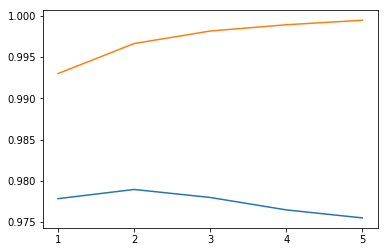

In [39]:
calculated_all_metrics(ex1_scores)
plot_learningcurve(ex1_scores, Labels.ALL, Metrics.ROC_AUC)

### Singlelayer CNN with multiple window sizes

In [40]:
ex2_scores = np.load('data/scores/cnn_multiwindowsizes/scores_1543641482.1065862.npy')
ex2_scores.shape

(5, 2, 5, 7, 2)

ROC AUC over 5 runs:
All labels:          0.9790 ±0.0006
Toxic:               0.9631 ±0.0007
Severe toxic:        0.9869 ±0.0006
Obscene:             0.9756 ±0.0003
Threat:              0.9848 ±0.0010
Insult:              0.9709 ±0.0010
Identity hate:       0.9767 ±0.0008
F1 over 5 runs:
All labels:          0.6401 ±0.0072
Toxic:               0.6710 ±0.0108
Severe toxic:        0.3568 ±0.0398
Obscene:             0.6836 ±0.0044
Threat:              0.4110 ±0.0366
Insult:              0.6549 ±0.0051
Identity hate:       0.5536 ±0.0135


/home/philipp/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


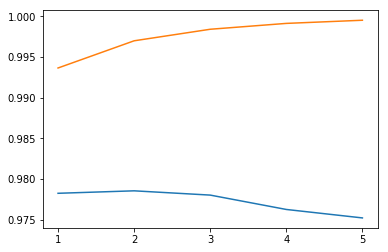

In [41]:
calculated_all_metrics(ex2_scores)
plot_learningcurve(ex2_scores, Labels.ALL, Metrics.ROC_AUC)

### Multilayer CNN

In [42]:
ex3_scores = np.load('data/scores/cnn_multilayer/scores_1543686279.5532448.npy')
ex3_scores.shape

(5, 2, 5, 7, 2)

ROC AUC over 5 runs:
All labels:          0.9776 ±0.0008
Toxic:               0.9607 ±0.0010
Severe toxic:        0.9873 ±0.0005
Obscene:             0.9752 ±0.0008
Threat:              0.9830 ±0.0007
Insult:              0.9692 ±0.0006
Identity hate:       0.9727 ±0.0019
F1 over 5 runs:
All labels:          0.6327 ±0.0029
Toxic:               0.6638 ±0.0101
Severe toxic:        0.3540 ±0.0364
Obscene:             0.6849 ±0.0080
Threat:              0.3632 ±0.0327
Insult:              0.6429 ±0.0025
Identity hate:       0.5155 ±0.0359


/home/philipp/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


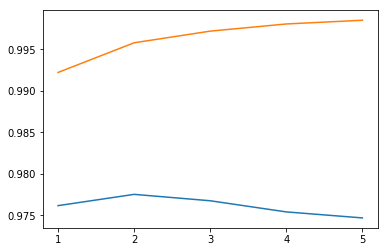

In [43]:
calculated_all_metrics(ex3_scores)
plot_learningcurve(ex3_scores, Labels.ALL, Metrics.ROC_AUC)

### Dilated CNN

In [44]:
ex4_scores = np.load('data/scores/cnn_dilated/scores_1545399367.0580235.npy')
ex4_scores.shape

(5, 2, 5, 7, 2)

ROC AUC over 5 runs:
All labels:          0.9763 ±0.0006
Toxic:               0.9599 ±0.0015
Severe toxic:        0.9867 ±0.0006
Obscene:             0.9753 ±0.0009
Threat:              0.9780 ±0.0014
Insult:              0.9672 ±0.0005
Identity hate:       0.9672 ±0.0025
F1 over 5 runs:
All labels:          0.6290 ±0.0059
Toxic:               0.6607 ±0.0064
Severe toxic:        0.3089 ±0.1151
Obscene:             0.6885 ±0.0092
Threat:              0.1300 ±0.1060
Insult:              0.6351 ±0.0058
Identity hate:       0.3079 ±0.0945


/home/philipp/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


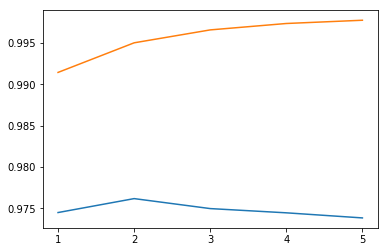

In [45]:
calculated_all_metrics(ex4_scores)
plot_learningcurve(ex4_scores, Labels.ALL, Metrics.ROC_AUC)

# Preprocessing comparison

### Baseline

In [46]:
ep1_scores = np.load('data/scores/preprocessing/e1_scores_1544101761.8759387.npy')
ep1_scores.shape

(5, 2, 5, 7, 2)

ROC AUC over 5 runs:
All labels:          0.9789 ±0.0007
Toxic:               0.9629 ±0.0006
Severe toxic:        0.9868 ±0.0004
Obscene:             0.9756 ±0.0003
Threat:              0.9841 ±0.0014
Insult:              0.9710 ±0.0008
Identity hate:       0.9766 ±0.0012
F1 over 5 runs:
All labels:          0.6358 ±0.0085
Toxic:               0.6655 ±0.0102
Severe toxic:        0.3658 ±0.0149
Obscene:             0.6829 ±0.0051
Threat:              0.4200 ±0.0282
Insult:              0.6524 ±0.0035
Identity hate:       0.5523 ±0.0160


/home/philipp/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


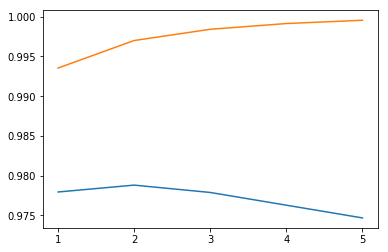

In [47]:
calculated_all_metrics(ep1_scores)
plot_learningcurve(ep1_scores, Labels.ALL, Metrics.ROC_AUC)

### Strip more than 3 of the same characters in a row

In [48]:
ep2_scores = np.load('data/scores/preprocessing/e2_scores_1544182966.0022054.npy')
ep2_scores.shape

(5, 2, 5, 7, 2)

ROC AUC over 5 runs:
All labels:          0.9789 ±0.0006
Toxic:               0.9628 ±0.0003
Severe toxic:        0.9869 ±0.0003
Obscene:             0.9760 ±0.0003
Threat:              0.9867 ±0.0016
Insult:              0.9712 ±0.0007
Identity hate:       0.9765 ±0.0011
F1 over 5 runs:
All labels:          0.6357 ±0.0090
Toxic:               0.6669 ±0.0101
Severe toxic:        0.3723 ±0.0069
Obscene:             0.6842 ±0.0043
Threat:              0.4327 ±0.0255
Insult:              0.6565 ±0.0029
Identity hate:       0.5530 ±0.0235


/home/philipp/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


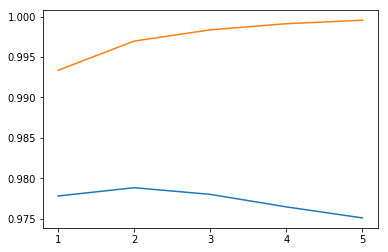

In [49]:
calculated_all_metrics(ep2_scores)
plot_learningcurve(ep2_scores, Labels.ALL, Metrics.ROC_AUC)

### Remove all punctuation

In [50]:
ep3_scores = np.load('data/scores/preprocessing/e3_scores_1545309175.410995.npy')
ep3_scores.shape

(5, 2, 5, 7, 2)

ROC AUC over 5 runs:
All labels:          0.9797 ±0.0004
Toxic:               0.9637 ±0.0004
Severe toxic:        0.9868 ±0.0005
Obscene:             0.9767 ±0.0006
Threat:              0.9859 ±0.0011
Insult:              0.9722 ±0.0003
Identity hate:       0.9768 ±0.0013
F1 over 5 runs:
All labels:          0.6380 ±0.0090
Toxic:               0.6654 ±0.0073
Severe toxic:        0.3923 ±0.0169
Obscene:             0.6817 ±0.0073
Threat:              0.4462 ±0.0139
Insult:              0.6546 ±0.0023
Identity hate:       0.5366 ±0.0157


/home/philipp/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


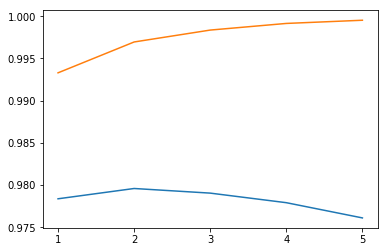

In [51]:
calculated_all_metrics(ep3_scores)
plot_learningcurve(ep3_scores, Labels.ALL, Metrics.ROC_AUC)

### Remove all punctuation except for .,!?

In [52]:
ep4_scores = np.load('data/scores/preprocessing/e4_scores_1545326105.8022852.npy')
ep4_scores.shape

(5, 2, 5, 7, 2)

ROC AUC over 5 runs:
All labels:          0.9797 ±0.0004
Toxic:               0.9639 ±0.0004
Severe toxic:        0.9864 ±0.0008
Obscene:             0.9764 ±0.0006
Threat:              0.9852 ±0.0007
Insult:              0.9722 ±0.0004
Identity hate:       0.9772 ±0.0009
F1 over 5 runs:
All labels:          0.6386 ±0.0066
Toxic:               0.6678 ±0.0076
Severe toxic:        0.3752 ±0.0147
Obscene:             0.6829 ±0.0054
Threat:              0.4080 ±0.0180
Insult:              0.6576 ±0.0052
Identity hate:       0.5547 ±0.0182


/home/philipp/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


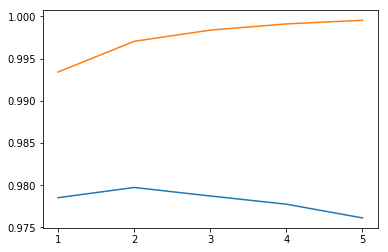

In [53]:
calculated_all_metrics(ep4_scores)
plot_learningcurve(ep4_scores, Labels.ALL, Metrics.ROC_AUC)

### Stemming

In [54]:
ep5_scores = np.load('data/scores/preprocessing/e5_scores_1544714914.6546211.npy')
ep5_scores.shape

(5, 2, 5, 7, 2)

ROC AUC over 5 runs:
All labels:          0.9797 ±0.0006
Toxic:               0.9637 ±0.0003
Severe toxic:        0.9878 ±0.0008
Obscene:             0.9766 ±0.0005
Threat:              0.9892 ±0.0014
Insult:              0.9719 ±0.0007
Identity hate:       0.9799 ±0.0013
F1 over 5 runs:
All labels:          0.6430 ±0.0103
Toxic:               0.6702 ±0.0091
Severe toxic:        0.3677 ±0.0382
Obscene:             0.6832 ±0.0053
Threat:              0.4208 ±0.0301
Insult:              0.6568 ±0.0054
Identity hate:       0.5618 ±0.0234


/home/philipp/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


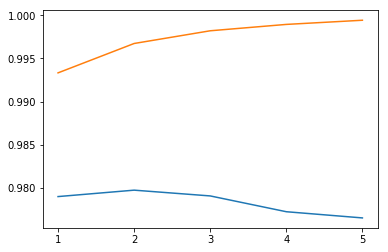

In [55]:
calculated_all_metrics(ep5_scores)
plot_learningcurve(ep5_scores, Labels.ALL, Metrics.ROC_AUC)

### Lemmatization

In [56]:
ep6_scores = np.load('data/scores/preprocessing/e6_scores_1544744071.8302839.npy')
ep6_scores.shape

(5, 2, 5, 7, 2)

ROC AUC over 5 runs:
All labels:          0.9796 ±0.0004
Toxic:               0.9630 ±0.0008
Severe toxic:        0.9865 ±0.0004
Obscene:             0.9766 ±0.0006
Threat:              0.9854 ±0.0019
Insult:              0.9724 ±0.0008
Identity hate:       0.9776 ±0.0007
F1 over 5 runs:
All labels:          0.6448 ±0.0037
Toxic:               0.6602 ±0.0130
Severe toxic:        0.3647 ±0.0209
Obscene:             0.6893 ±0.0057
Threat:              0.4233 ±0.0380
Insult:              0.6582 ±0.0058
Identity hate:       0.5778 ±0.0155


/home/philipp/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


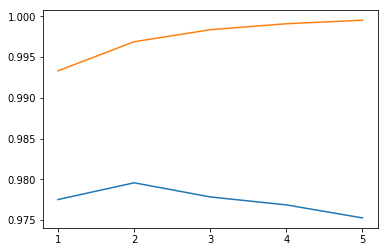

In [57]:
calculated_all_metrics(ep6_scores)
plot_learningcurve(ep6_scores, Labels.ALL, Metrics.ROC_AUC)

### Replace unknown tokens

In [58]:
ep7_scores = np.load('data/scores/preprocessing/e7_scores_1544790681.2920856.npy')
ep7_scores.shape

(5, 2, 5, 7, 2)

ROC AUC over 5 runs:
All labels:          0.9776 ±0.0008
Toxic:               0.9622 ±0.0010
Severe toxic:        0.9863 ±0.0004
Obscene:             0.9728 ±0.0007
Threat:              0.9855 ±0.0006
Insult:              0.9690 ±0.0009
Identity hate:       0.9632 ±0.0017
F1 over 5 runs:
All labels:          0.6451 ±0.0092
Toxic:               0.6737 ±0.0079
Severe toxic:        0.3382 ±0.0979
Obscene:             0.6796 ±0.0046
Threat:              0.4112 ±0.0312
Insult:              0.6442 ±0.0047
Identity hate:       0.5240 ±0.0126


/home/philipp/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


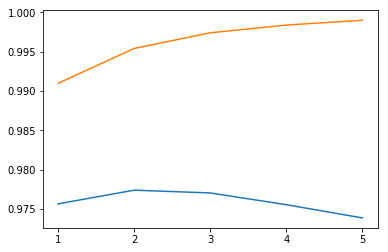

In [59]:
calculated_all_metrics(ep7_scores)
plot_learningcurve(ep7_scores, Labels.ALL, Metrics.ROC_AUC)

### Replace punctuation except for .,!? + Lemmatization

In [6]:
ep8_scores = np.load('data/scores/preprocessing/e8_scores_1547583857.9355667.npy')
ep8_scores.shape

(5, 2, 5, 7, 2)

ROC AUC over 5 runs:
All labels:          0.9805 ±0.0004
Toxic:               0.9644 ±0.0002
Severe toxic:        0.9868 ±0.0006
Obscene:             0.9777 ±0.0005
Threat:              0.9862 ±0.0009
Insult:              0.9733 ±0.0005
Identity hate:       0.9788 ±0.0013
F1 over 5 runs:
All labels:          0.6443 ±0.0087
Toxic:               0.6681 ±0.0127
Severe toxic:        0.3564 ±0.0206
Obscene:             0.6849 ±0.0017
Threat:              0.4302 ±0.0558
Insult:              0.6605 ±0.0037
Identity hate:       0.5572 ±0.0146


/home/philipp/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


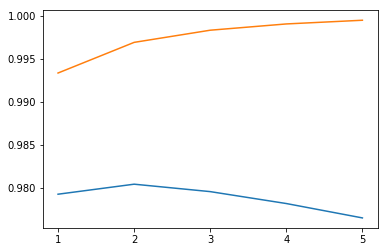

In [7]:
calculated_all_metrics(ep8_scores)
plot_learningcurve(ep8_scores, Labels.ALL, Metrics.ROC_AUC)

### Replace punctuation except for .,!? + Stemming

In [4]:
ep9_scores = np.load('data/scores/preprocessing/e9_scores_1547548853.502363.npy')
ep9_scores.shape

(5, 2, 5, 7, 2)

ROC AUC over 5 runs:
All labels:          0.9807 ±0.0003
Toxic:               0.9646 ±0.0002
Severe toxic:        0.9872 ±0.0004
Obscene:             0.9774 ±0.0006
Threat:              0.9894 ±0.0009
Insult:              0.9732 ±0.0006
Identity hate:       0.9806 ±0.0011
F1 over 5 runs:
All labels:          0.6443 ±0.0054
Toxic:               0.6690 ±0.0078
Severe toxic:        0.3706 ±0.0326
Obscene:             0.6833 ±0.0040
Threat:              0.3965 ±0.0270
Insult:              0.6633 ±0.0041
Identity hate:       0.5535 ±0.0199


/home/philipp/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


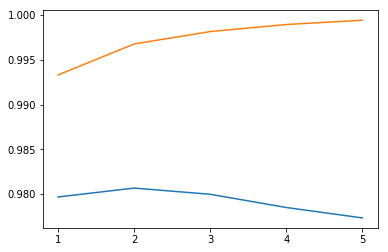

In [5]:
calculated_all_metrics(ep9_scores)
plot_learningcurve(ep9_scores, Labels.ALL, Metrics.ROC_AUC)

### Replace punctuation + Stemming

In [5]:
ep10_scores = np.load('data/scores/preprocessing/e10_scores_1547600264.255076.npy')
ep10_scores.shape

(5, 2, 5, 7, 2)

ROC AUC over 5 runs:
All labels:          0.9805 ±0.0004
Toxic:               0.9645 ±0.0006
Severe toxic:        0.9874 ±0.0007
Obscene:             0.9773 ±0.0003
Threat:              0.9899 ±0.0005
Insult:              0.9731 ±0.0006
Identity hate:       0.9800 ±0.0013
F1 over 5 runs:
All labels:          0.6444 ±0.0078
Toxic:               0.6710 ±0.0075
Severe toxic:        0.3950 ±0.0192
Obscene:             0.6853 ±0.0033
Threat:              0.4155 ±0.0237
Insult:              0.6561 ±0.0048
Identity hate:       0.5653 ±0.0109


/home/philipp/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


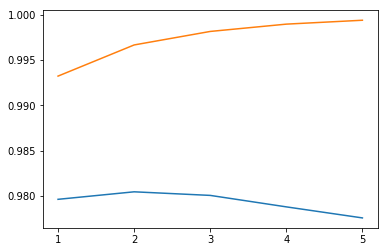

In [6]:
calculated_all_metrics(ep10_scores)
plot_learningcurve(ep10_scores, Labels.ALL, Metrics.ROC_AUC)

### Replace punctuation + lemmatization

In [5]:
ep11_scores = np.load('data/scores/preprocessing/e11_scores_1547637074.9931095.npy')
ep11_scores.shape

(5, 2, 5, 7, 2)

ROC AUC over 5 runs:
All labels:          0.9803 ±0.0003
Toxic:               0.9641 ±0.0007
Severe toxic:        0.9869 ±0.0007
Obscene:             0.9776 ±0.0005
Threat:              0.9862 ±0.0013
Insult:              0.9728 ±0.0005
Identity hate:       0.9786 ±0.0013
F1 over 5 runs:
All labels:          0.6449 ±0.0059
Toxic:               0.6658 ±0.0097
Severe toxic:        0.3758 ±0.0317
Obscene:             0.6861 ±0.0046
Threat:              0.4354 ±0.0329
Insult:              0.6548 ±0.0034
Identity hate:       0.5499 ±0.0285


/home/philipp/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


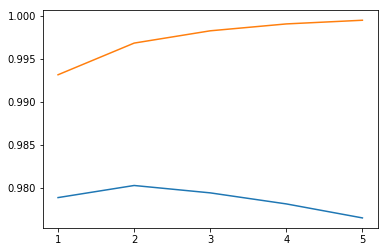

In [6]:
calculated_all_metrics(ep11_scores)
plot_learningcurve(ep11_scores, Labels.ALL, Metrics.ROC_AUC)

# YouToxic experiments

### Youtoxic with transfer learning

In [60]:
eyt1_scores = np.load('data/scores/youtoxic/youtoxic_1546250048.7388098.npy')
eyt1_scores.shape

(5, 2, 20, 4, 2)

ROC AUC over 5 runs:
All labels:          0.8091 ±0.0064
Toxic:               0.7820 ±0.0095
Severe toxic:        0.8003 ±0.0074
Obscene:             0.7675 ±0.0088
F1 over 5 runs:
All labels:          0.6118 ±0.0101
Toxic:               0.6801 ±0.0110
Severe toxic:        0.6273 ±0.0109
Obscene:             0.2367 ±0.0188


/home/philipp/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


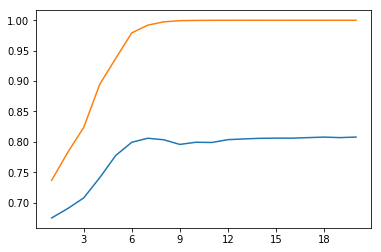

In [68]:
calculate_all_youtoxic_metrics(eyt1_scores)
plot_learningcurve(eyt1_scores, YoutoxicLabels.ALL, Metrics.ROC_AUC)

(5, 20)